1. Image Data

Basically picture in general contains 3 laye of colours. Those are called as colour channels (RGB). Certainty on one image, the pixel has a range of 0-255.

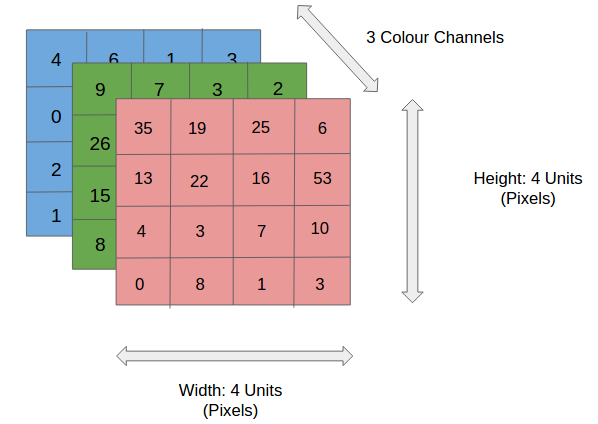

2. CNN (Convolutional Neural Network)

Each convolutional neural network is made up of one or many convolutional layers. These layers are different than the dense layers we have seen previously. Their goal is to find patterns from within images that can be used to classify the image or parts of it.

The fundemental difference between a dense layer and a convolutional layer is that dense layers detect patterns globally while convolutional layers detect patterns locally. When we have a densly connected layer each node in that layer sees all the data from the previous layer. This means that this layer is looking at all the information and is only capable of analyzing the data in a global capacity

-------------------------------------------------------------------------------------------------------------------------
Dense Layer: A dense layer will consider the ENTIRE image. It will look at all the pixels and use that information to generate some output.

Convolutional Layer: The convolutional layer will look at specific parts of the image. In this example let's say it analyzes the highlighted parts below and detects patterns there.

Example of convolutional layer:

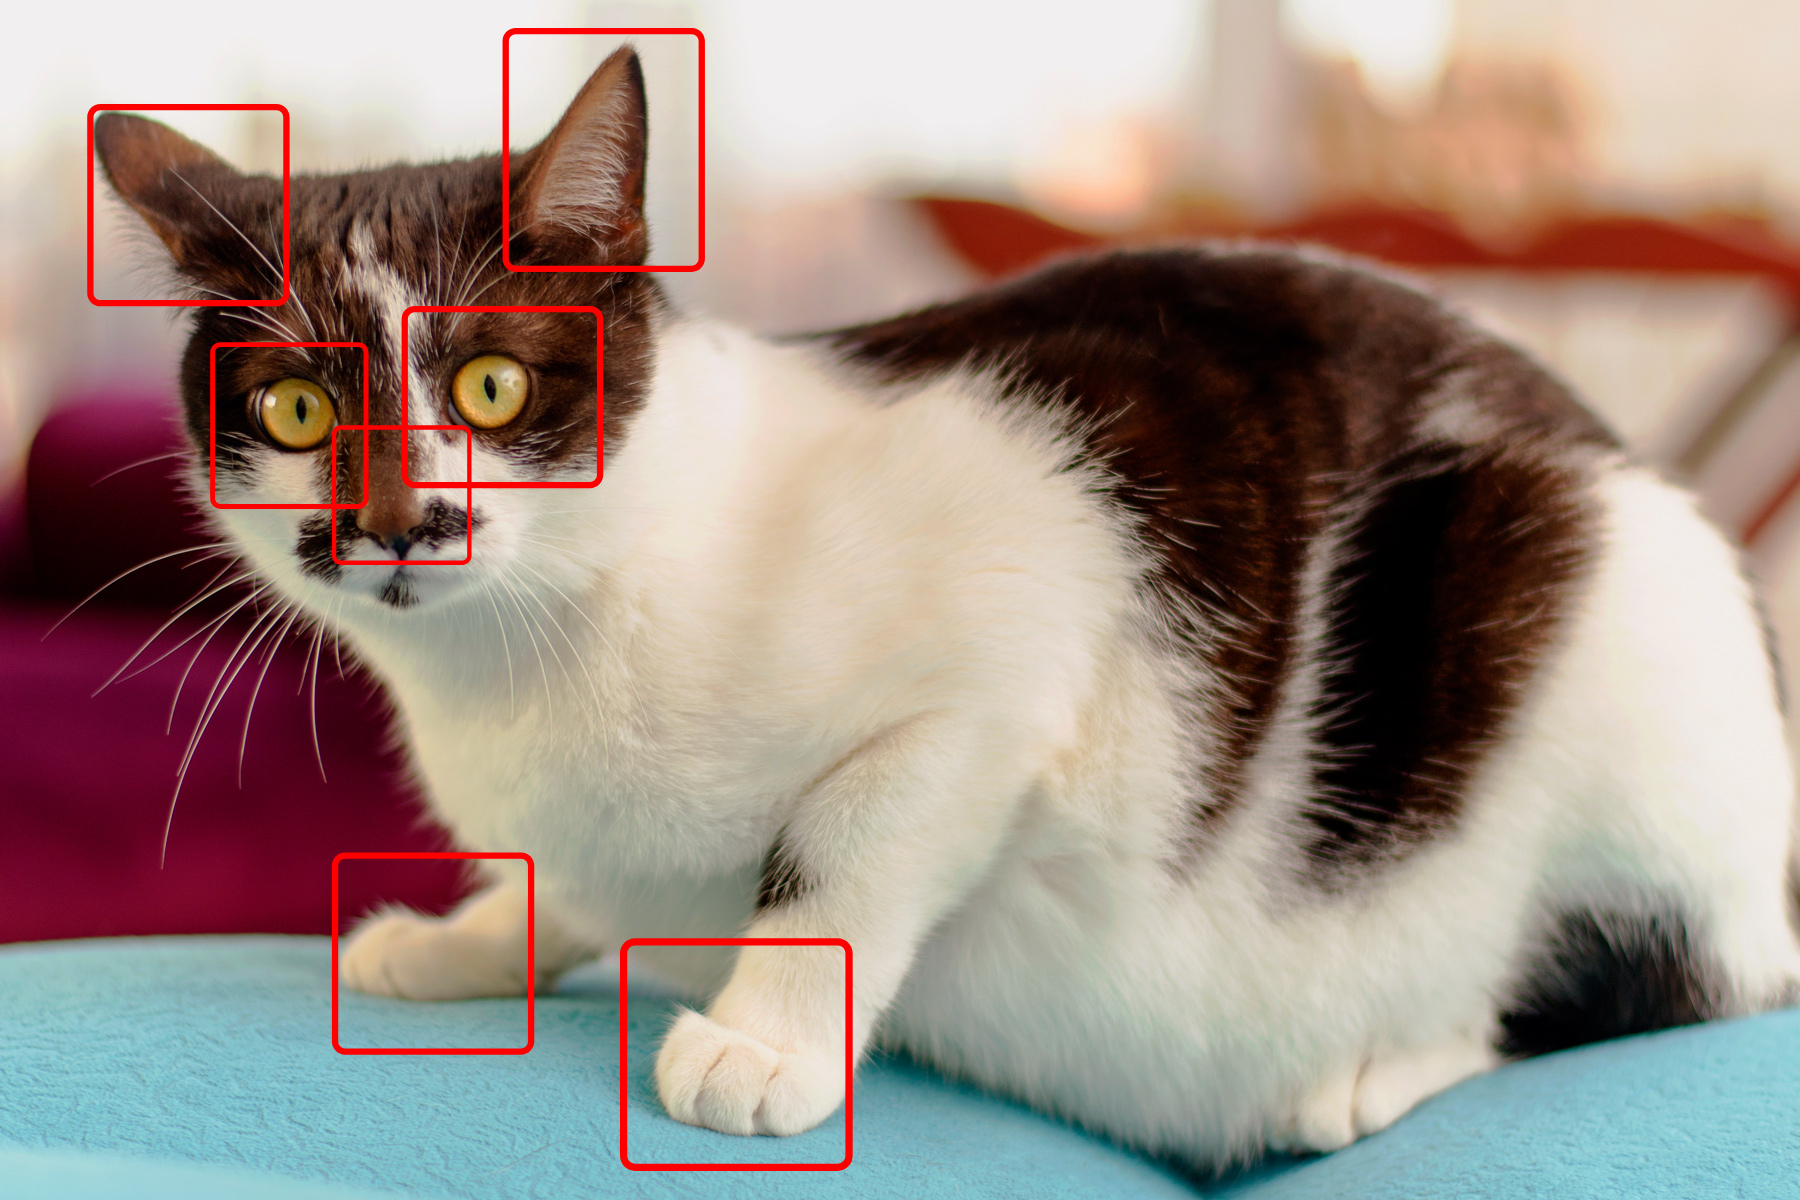

In [1]:
#Creating a CONVNET

#import modules
import tensorflow as tf
from tensorflow import keras
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pickle
import os
import random as rd
from IPython.display import clear_output
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [2]:
#Getting the data
getdata=keras.datasets.cifar10.load_data()                                                                         #Shit's taking too long :sob:
(train_data, train_label), (test_data, test_label)=getdata                                                          #50|50 split
label_names=["airplane", "automobile", "bird", "cat", "deer", "dog", "frog", "horse", "ship", "truck"]

shapeoneimage=train_data[0].shape
train_data[0].max();train_data[0].min()                                                                            #RGB 0-255 each R,G and B

#changing 0-255 into 0- scale1
train_data=train_data/255.0; test_data=test_data/255.0


#splitting data into 0.8 | 0.2 instead
data=np.concatenate((train_data, test_data), axis=0)
labels=np.concatenate((train_label, test_label), axis=0)
train_data, test_data, train_label, test_label = train_test_split(data, labels, train_size=0.8)

In [4]:
#Idk don't use this!
'''
#Don't use this
#Manual GRAAAAA!1!
def unpickle(file, meta=False):
    with open(file, 'rb') as fo:
        dict = pickle.load(fo, encoding='bytes')
        if meta:
            return dict[b'label_names']
        else:
            data=dict[b'data']
            label=dict[b'labels']
        return data, label

path="../Files/cifar-10-batches-py/"
getpathfiles=os.listdir(path)

train_data=[];test_data=[]; train_label=[]; test_label=[]
for i in getpathfiles:
    file=path+str(i)
    print(file)
    if i.startswith("data"):
        temp1, temp2 = unpickle(file)
        train_data.append(temp1); train_label.append(temp2)
    elif i.startswith("test"):
        temp1, temp2 = unpickle(file)
        test_data.append(temp1); test_label.append(temp2)
    elif i.endswith("meta"):
        label_names=unpickle((file), meta=True)
'''

'\n#Don\'t use this\n#Manual GRAAAAA!1!\ndef unpickle(file, meta=False):\n    with open(file, \'rb\') as fo:\n        dict = pickle.load(fo, encoding=\'bytes\')\n        if meta:\n            return dict[b\'label_names\']\n        else:\n            data=dict[b\'data\']\n            label=dict[b\'labels\']\n        return data, label\n\npath="../Files/cifar-10-batches-py/"\ngetpathfiles=os.listdir(path)\n\ntrain_data=[];test_data=[]; train_label=[]; test_label=[]\nfor i in getpathfiles:\n    file=path+str(i)\n    print(file)\n    if i.startswith("data"):\n        temp1, temp2 = unpickle(file)\n        train_data.append(temp1); train_label.append(temp2)\n    elif i.startswith("test"):\n        temp1, temp2 = unpickle(file)\n        test_data.append(temp1); test_label.append(temp2)\n    elif i.endswith("meta"):\n        label_names=unpickle((file), meta=True)\n'

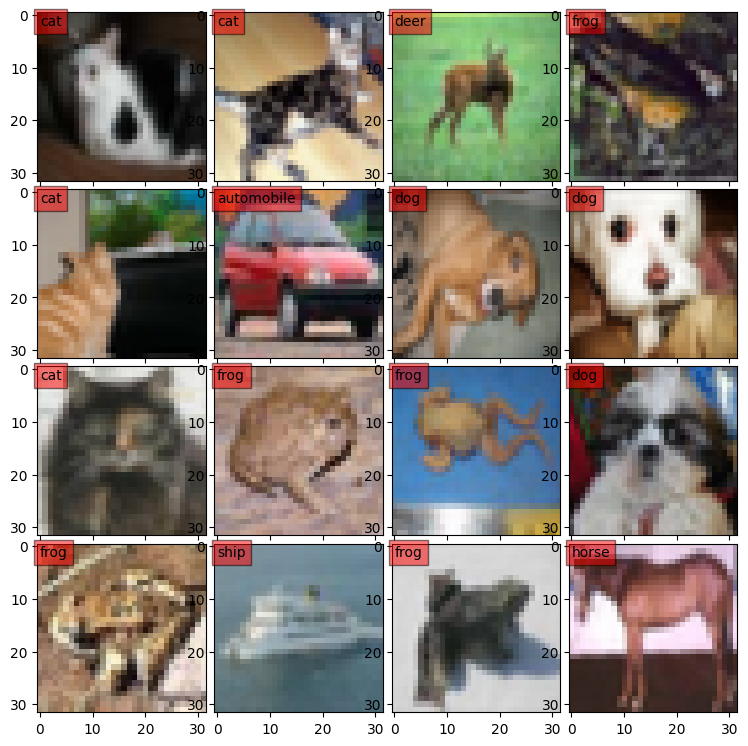

In [5]:
#show 16 images
fig = plt.figure(figsize=(7,7))
fig.subplots_adjust(0,0,1,1,0.05,0.05)
for i in range(16):
    randint=rd.randint(0,len(train_data))
    ax=fig.add_subplot(4,4 ,i+1)
    ax.imshow(train_data[randint])
    ax.text(0, 2, str(label_names[int(train_label[randint])]), bbox=dict(facecolor='red', alpha=0.5))
plt.show()

In [3]:
#getmodel
#CNN ARCHITECTURE
#(A common architecture for a CNN is a stack of Conv2D and MaxPooling2D layers followed by a few denesly connected layers. )
ANN=keras.Sequential([keras.layers.Conv2D(32, (3,3), activation="relu", input_shape=train_data[0].shape), #1st layer (Input layer)
                      keras.layers.MaxPool2D((2,2)),                                                      #2nd layer (Max poolingoperation using 2x2 samples and a stride of 2)
                      keras.layers.Conv2D(64, (3, 3), activation='relu'),                                 #layers 3-6 adding more depth
                      keras.layers.MaxPooling2D((2, 2)),                                                  
                      keras.layers.Conv2D(64, (3, 3), activation='relu')])
ANN.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 30, 30, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 15, 15, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 13, 13, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 6, 6, 64)          0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 4, 4, 64)          36928     
                                                                 
Total params: 56320 (220.00 KB)
Trainable params: 56320 

In [4]:
#Adding dense layers as a way to classify them

ANN.add(keras.layers.Flatten())                                                     #required to flatten the dataset out firsthand
ANN.add(keras.layers.Dense(512, activation="relu"))                                 #DENSELAYERS GRAAAA
ANN.add(keras.layers.Dense(256, activation="relu"))
ANN.add(keras.layers.Dense(128, activation="relu"))
ANN.add(keras.layers.Dense(64, activation="relu"))
ANN.add(keras.layers.Dense(32, activation="relu"))
ANN.add(keras.layers.Dense(np.unique(train_label).size))                            #output=10 cuz there's only 10 categories in the label
ANN.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 30, 30, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 15, 15, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 13, 13, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 6, 6, 64)          0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 4, 4, 64)          36928     
                                                                 
 flatten (Flatten)           (None, 1024)              0

In [5]:
ANN.compile(metrics=["accuracy"], optimizer='adam', loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True))

ANN.fit(train_data, train_label, epochs=8, validation_data=(test_data, test_label))

Epoch 1/8
1500/1500 [==============================] - 51s 32ms/step - loss: 1.6776 - accuracy: 0.3679 - val_loss: 1.3722 - val_accuracy: 0.5018
Epoch 2/8
1500/1500 [==============================] - 47s 31ms/step - loss: 1.2613 - accuracy: 0.5437 - val_loss: 1.1657 - val_accuracy: 0.5836
Epoch 3/8
1500/1500 [==============================] - 46s 31ms/step - loss: 1.0895 - accuracy: 0.6120 - val_loss: 1.0627 - val_accuracy: 0.6273
Epoch 4/8
1500/1500 [==============================] - 46s 31ms/step - loss: 0.9494 - accuracy: 0.6653 - val_loss: 0.9925 - val_accuracy: 0.6562
Epoch 5/8
1500/1500 [==============================] - 42s 28ms/step - loss: 0.8523 - accuracy: 0.7015 - val_loss: 1.0349 - val_accuracy: 0.6467
Epoch 6/8
1500/1500 [==============================] - 43s 28ms/step - loss: 0.7626 - accuracy: 0.7310 - val_loss: 0.9290 - val_accuracy: 0.6871
Epoch 7/8
1500/1500 [==============================] - 43s 29ms/step - loss: 0.6799 - accuracy: 0.7634 - val_loss: 0.9732 - val_ac

In [1]:
predicted=[i.argmax() for i in ANN.predict(test_data)]
ANN.evaluate(test_data, test_label)

NameError: name 'ANN' is not defined

0.703125


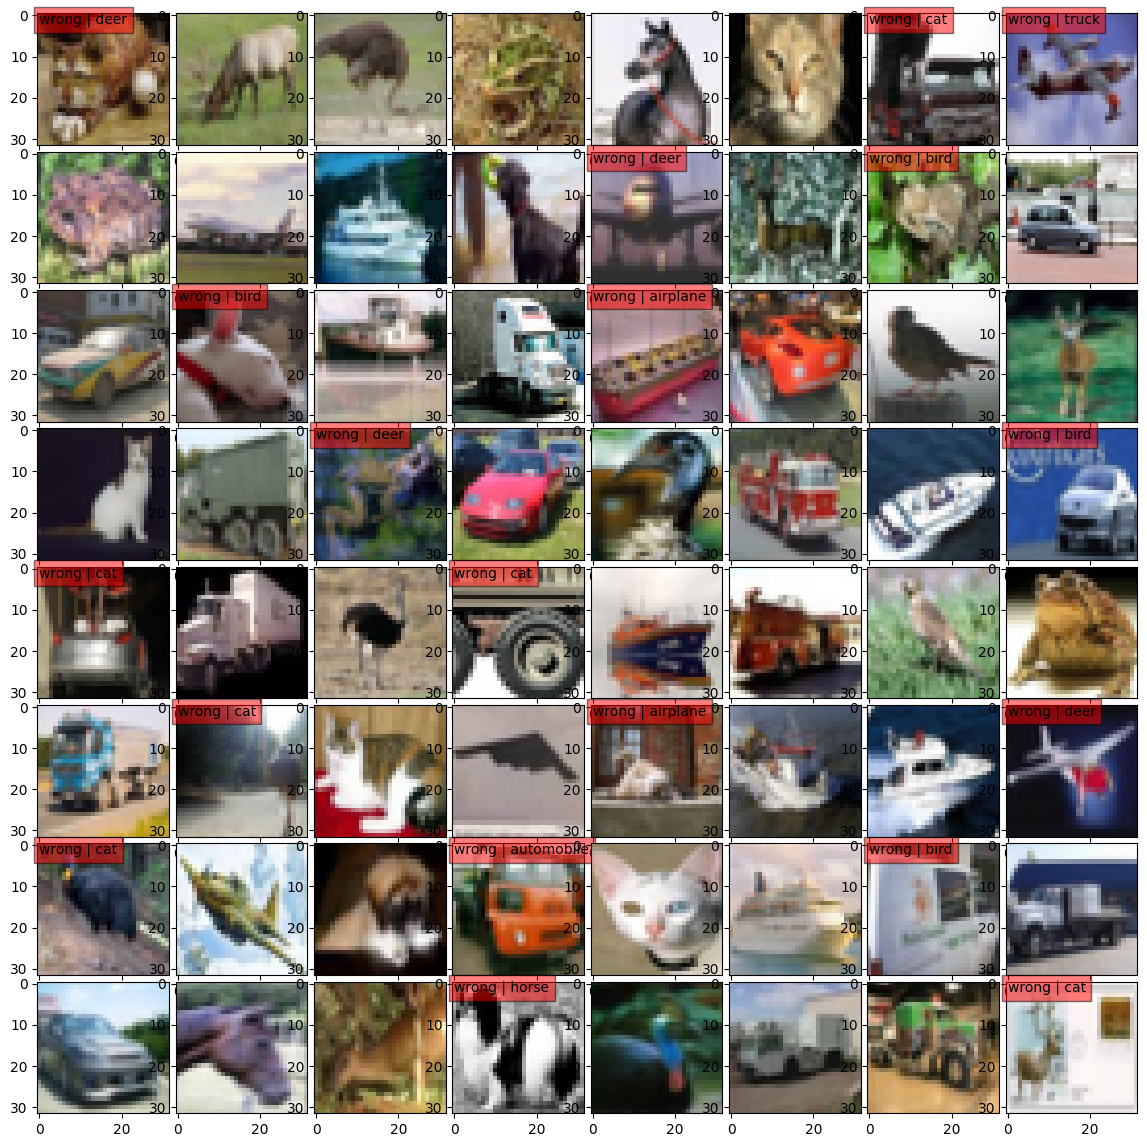

In [10]:
fig = plt.figure(figsize=(11,11))
fig.subplots_adjust(0,0,1,1,0.05,0.05)
randint=[]
for i in range(64):
    randint.append(rd.randint(0, len(test_data)))
    ax=fig.add_subplot(8,8, i+1)
    ax.imshow(test_data[randint[i]])
    if predicted[randint[i]]!=test_label[randint[i]]:
        ax.text(0,2, f'wrong | {label_names[predicted[int(randint[i])]]}', bbox=dict(facecolor='red', alpha=0.5))
print(accuracy_score(np.array(test_label)[randint], np.array(predicted)[randint]))

SCENARIO: WHAT IF YOU'RE WORKING WITH SMALL DATASETS

self explanotary (Big ass dataset is somewhat required in order to achieve a marvelous score)

DATA AUGMENTATION

To avoid overfitting and create a larger dataset from a smaller one we can use a technique called data augmentation. This is simply performing random transofrmations on our images so that our model can generalize better. These transformations can be things like compressions, rotations, stretches and even color changes.

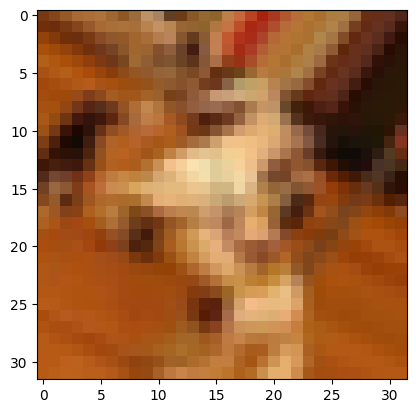

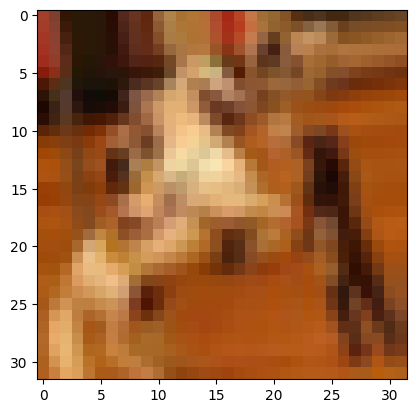

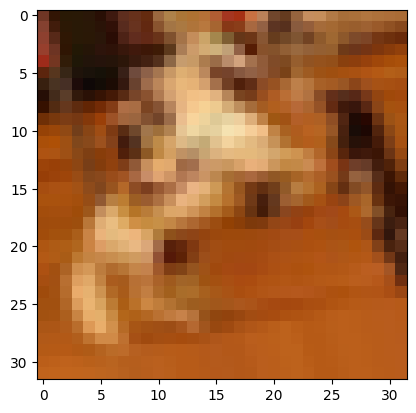

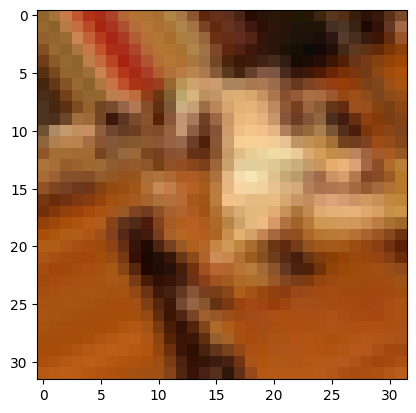

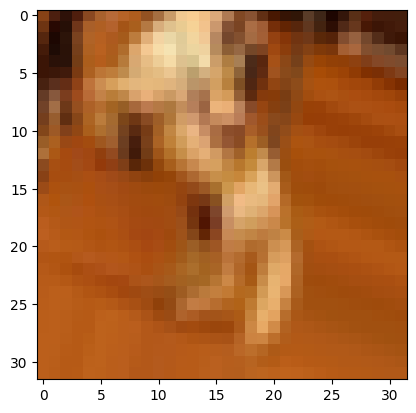

In [22]:
#example
import keras.preprocessing.image as img
#creates a data generator that transform images based from an existing image
imagegenerator= img.ImageDataGenerator(
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest')

# pick an image to transform
test_img = train_data[20]           #image of a cat
image = img.img_to_array(test_img)  # convert image to numpy arry
image = image.reshape((1,) + image.shape)  # reshape image
i=0

for batch in imagegenerator.flow(image, save_prefix='test', save_format='jpeg'):  # this loops runs forever until we break, saving images to current directory with specified prefix
    plt.figure(i)
    plot = plt.imshow(img.img_to_array(batch[0]))
    i += 1
    if i > 4:  # show 4 images
        break

plt.show()